# LGMVIP March Data Science Internship Task 1
Iris flower KMeans Clustering ML Project

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Import data
df=pd.read_csv("E:\Data files\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
x.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#Standardize data
SS = StandardScaler()
X = SS.fit_transform(x)
X = pd.DataFrame(X, columns=df.columns[:-1])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [7]:
#Reduce dimension (PCA)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


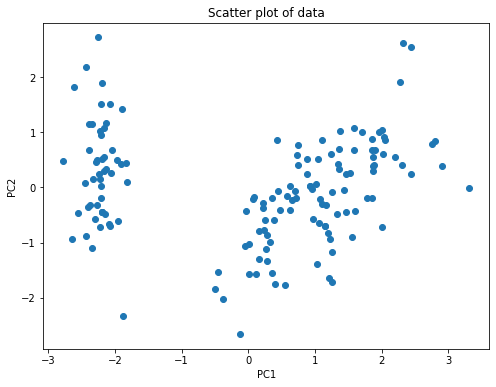

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

In [9]:
# Train the model
k_means = KMeans(n_clusters=3)
k_means_model = k_means.fit(X)

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Predicted Clusters with the Clusters Centers')

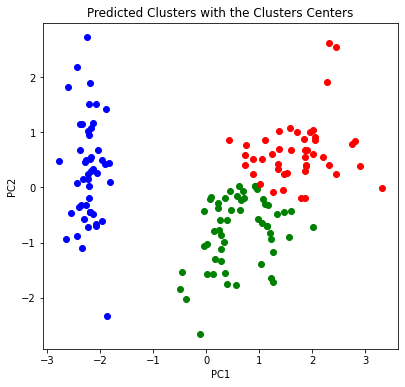

In [10]:
fig = plt.figure(figsize=(14,6))
#predicted
ax1 = fig.add_subplot(121)
pred = k_means_model.predict(X)
colours = ['blue','green','red']
for idx in range(3):
    plt.scatter(X[pred == idx]['PC1'], X[pred == idx]['PC2'], c = colours[idx])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted Clusters with the Clusters Centers')

In [11]:
k =3  #3 clusters
df_clusters = [X[k_means_model.labels_==i] for i in range(k)]
len(df_clusters)

3

In [12]:
stat_dict = {
    'Cluster' : list(range(k)),
    'Size' : [len(df_clusters[i]) for i in range(k)],
    'Mean PC1' : [round(df_clusters[i]['PC1'].mean(), 2) for i in range(k)],
    'Std PC1' : [round(df_clusters[i]['PC1'].std(), 2) for i in range(k)],
    'Mean PC2' : [round(df_clusters[i]['PC2'].mean(), 2) for i in range(k)],
    'Std PC2' : [round(df_clusters[i]['PC2'].std(), 2) for i in range(k)],
}

In [13]:
df_clusters_stats = pd.DataFrame(stat_dict)
df_clusters_stats

,Cluster,Size,Mean PC1,Std PC1,Mean PC2,Std PC2
0,0,50,-2.22,0.20,0.29,0.94
1,1,55,0.61,0.56,-0.80,0.63
2,2,45,1.72,0.63,0.65,0.58
